https://www.kaggle.com/datasets/jarredpriester/rolling-stones-spotify-dataset

The columns in this dataset are:

**name -** the name of the song

**album -** the name of the album

**release_date -** the day month and year the album was released

**track number -** the order the song appears on the album

**id -** the Spotify id for the song

**uri -** the Spotify uri for the song

**acousticness -** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability -** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy -** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness -** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness -** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness -** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**speechiness -** detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo -** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**valence -** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**popularity -** the popularity of the song from 0 to 100

**duration_ms -** The duration of the track in milliseconds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados/rolling_stones_spotify.csv', usecols=range(1,18))

In [3]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.drop(['id', 'uri'], axis=1, inplace=True)

In [4]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [6]:
df.shape

(1610, 15)

In [7]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2.643,0.0898,71.995,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1.568,0.1880,162.428,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4.386,0.1280,105.124,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5.145,0.0292,72.648,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5.871,0.0390,127.329,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8.007,0.0406,115.870,0.336,13,95626


In [10]:
len(df['album'].unique())

90

In [11]:
data_inicial = df['release_date'].min()
data_final = df['release_date'].max()

print('Data Inicial: ', data_inicial.strftime('%Y-%m-%d'))
print('Data Final: ', data_final.strftime('%Y-%m-%d'))
print('Anos em Atividade: ', int((data_final - data_inicial).days / 365.2425))

Data Inicial:  1964-04-16
Data Final:  2022-06-10
Anos em Atividade:  58


In [12]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920


In [13]:
df['duration_min'] = df['duration_ms'] / 60_000

In [14]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,5.085100


In [15]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920,1.805558


In [16]:
df.groupby('album')['duration_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duration_min, Length: 90, dtype: float64

In [17]:
mean_duration = df.groupby('album')['duration_min'].mean()\
                  .sort_values(ascending=False)
mean_duration.head()

album
Havana Moon (Live)                 6.632819
Bridges To Bremen (Live)           6.332265
Jamming With Edward                6.042794
Live At The Checkerboard Lounge    6.009647
Totally Stripped - Paris (Live)    5.947430
Name: duration_min, dtype: float64

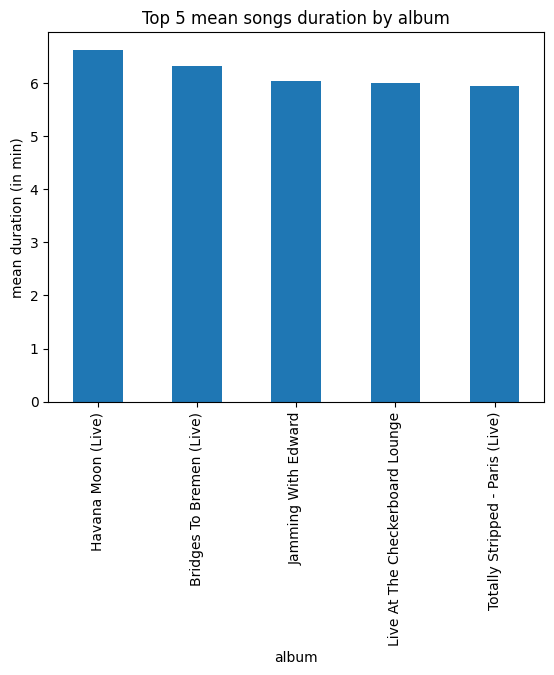

In [18]:
mean_duration.head().plot(kind='bar')
plt.ylabel('mean duration (in min)')
plt.title('Top 5 mean songs duration by album')
plt.show()

In [19]:
songs_by_album = df['album'].value_counts().head(10)
songs_by_album.head()

album
Voodoo Lounge Uncut (Live)     56
Honk (Deluxe)                  47
Live Licks                     46
Tattoo You (Super Deluxe)      46
Some Girls (Deluxe Version)    44
Name: count, dtype: int64

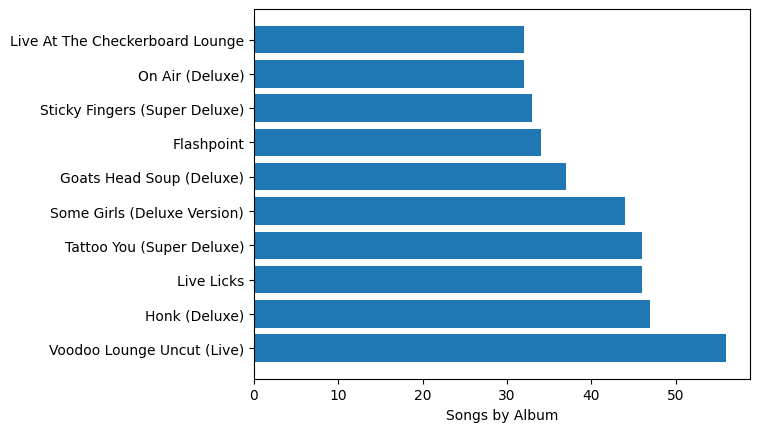

In [20]:
plt.barh(songs_by_album.index, songs_by_album.values)
plt.xlabel('Songs by Album')
plt.show()

In [21]:
last_decade = df[df['release_date'].between(pd.to_datetime('2011'),
                                           pd.to_datetime('2020'))]
last_decade.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
189,(I Can't Get No) Satisfaction - Live,Bridges To Buenos Aires (Live),2019-11-08,1,0.0215,0.294,0.986,0.050300,0.588,-5.094,0.2060,142.591,0.0918,24,320440,5.340667
190,Let's Spend The Night Together - Live,Bridges To Buenos Aires (Live),2019-11-08,2,0.1080,0.487,0.983,0.000030,0.944,-4.454,0.2510,143.530,0.2870,24,245493,4.091550
191,Flip The Switch - Live,Bridges To Buenos Aires (Live),2019-11-08,3,0.0827,0.335,0.972,0.003720,0.931,-4.931,0.2080,152.321,0.3370,19,243906,4.065100
192,Gimme Shelter - Live,Bridges To Buenos Aires (Live),2019-11-08,4,0.0997,0.438,0.957,0.005540,0.774,-5.064,0.1350,119.245,0.2720,25,397386,6.623100
193,Sister Morphine - Live,Bridges To Buenos Aires (Live),2019-11-08,5,0.1050,0.246,0.913,0.000478,0.969,-5.153,0.0921,80.371,0.3320,19,379800,6.330000


In [22]:
last_decade_popularity = last_decade.groupby('album')['popularity']\
                                    .sum().sort_values(ascending=False)\
                                    .head(10)
display(last_decade_popularity.head())
print()
last_decade_popularity.info()

album
Honk (Deluxe)                      1232
Voodoo Lounge Uncut (Live)          654
On Air (Deluxe)                     573
Live At The Checkerboard Lounge     482
Havana Moon (Live)                  445
Name: popularity, dtype: int64


<class 'pandas.core.series.Series'>
Index: 10 entries, Honk (Deluxe) to Ladies & Gentlemen (Live)
Series name: popularity
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [23]:
pop_percent = last_decade_popularity / last_decade_popularity.sum() * 100
pop_percent.head()

album
Honk (Deluxe)                      23.153543
Voodoo Lounge Uncut (Live)         12.290923
On Air (Deluxe)                    10.768653
Live At The Checkerboard Lounge     9.058448
Havana Moon (Live)                  8.363090
Name: popularity, dtype: float64

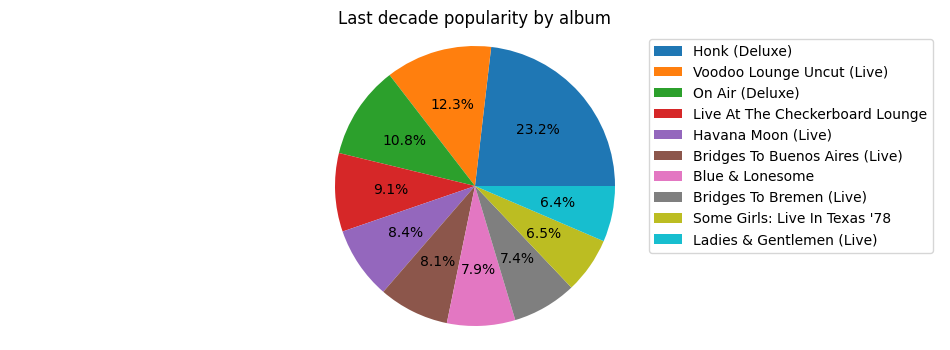

In [24]:
labels = pop_percent.index.tolist()
percentages = pop_percent.values.tolist()

fig, ax = plt.subplots(figsize=(12, 4))
ax.pie(percentages, autopct='%1.1f%%')
ax.axis('equal')

plt.title('Last decade popularity by album')
plt.legend(labels, loc='best')
plt.show()

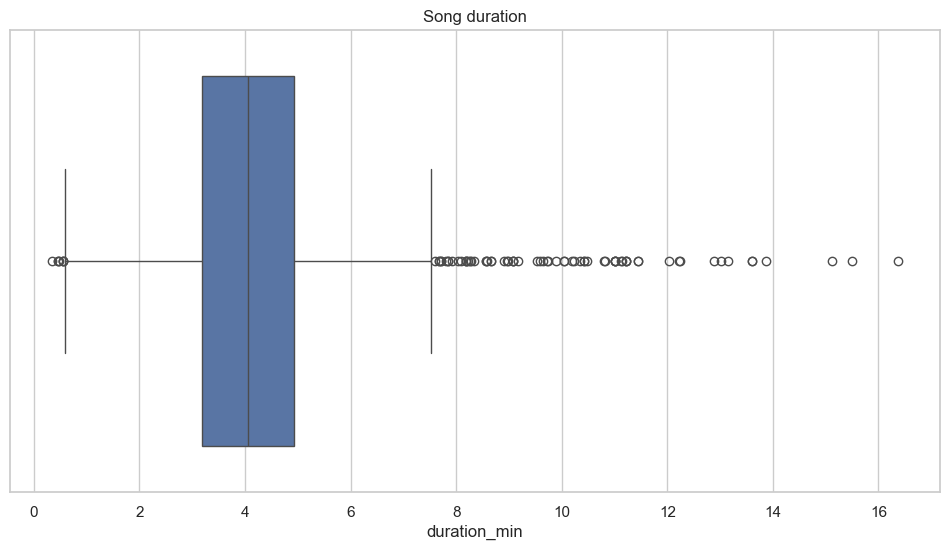

In [25]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x='duration_min', data=df)

ax.set_title('Song duration')

plt.show()

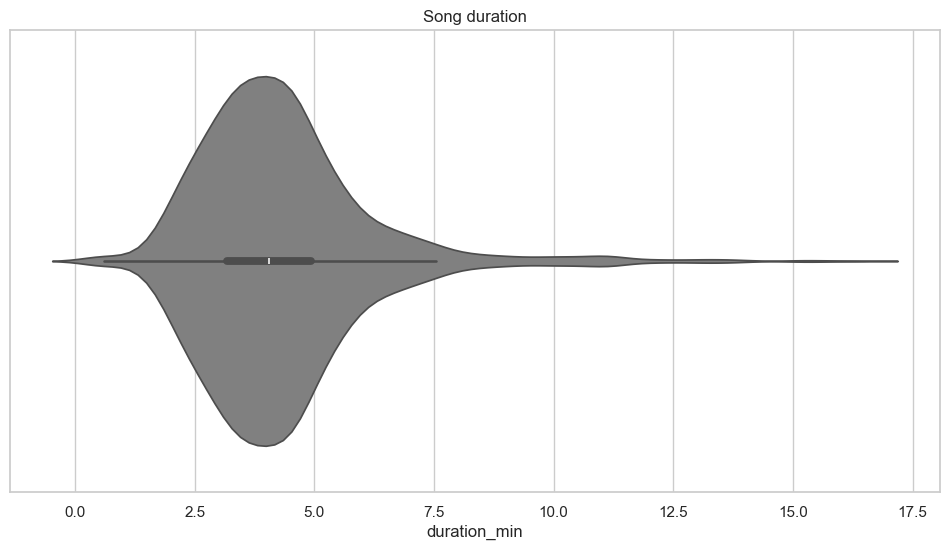

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

sns.violinplot(x='duration_min', data=df, color='gray')

ax.set_title('Song duration')

plt.show()

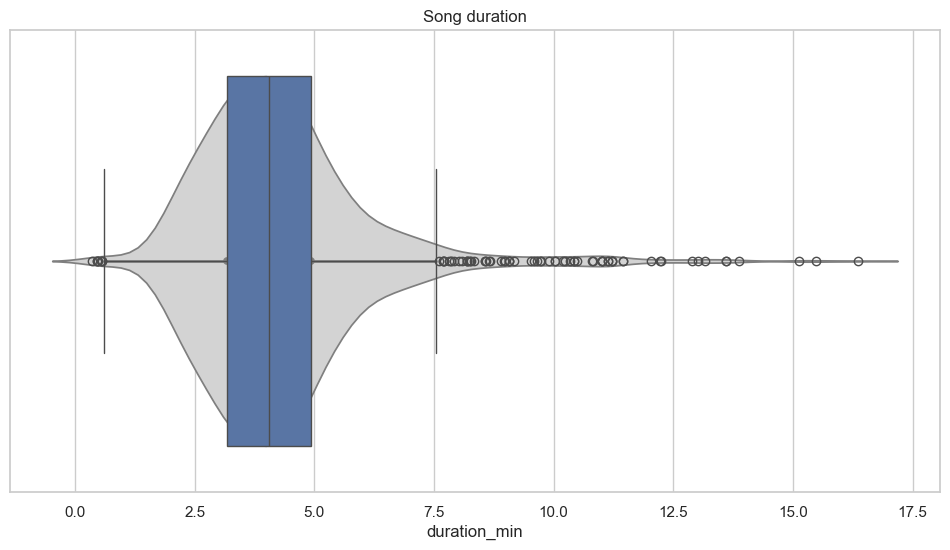

In [27]:
fig, ax = plt.subplots(figsize=(12,6))

sns.violinplot(x='duration_min', data=df, ax=ax, color='lightgray')
sns.boxplot(x='duration_min', data=df, ax=ax)

ax.set_title('Song duration')

plt.show()

In [28]:
def live_music(df):
    if df['liveness'] >= 0.8:
        return True
    else:
        return False

In [29]:
df['live_music'] = df.apply(live_music, axis=1)

In [30]:
df['pythonic_live_music'] = df.apply(lambda x: True if x['liveness'] >= 0.8 else False, axis=1)

In [31]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,live_music,pythonic_live_music
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,0.810667,True,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,4.219550,True,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,4.386000,True,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,5.098000,True,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,5.085100,True,True


In [32]:
df.groupby('pythonic_live_music')['pythonic_live_music'].count()

pythonic_live_music
False    1112
True      498
Name: pythonic_live_music, dtype: int64

In [33]:
df_studio = df[~df['live_music']]
df_live = df[df['live_music']]

In [34]:
print('Duração Média Músicas ao Vivo: ', df_live['duration_min'].mean())

Duração Média Músicas ao Vivo:  5.088648962516734


In [35]:
print('Duração Média Músicas em Estúdio: ', df_studio['duration_min'].mean())

Duração Média Músicas em Estúdio:  3.940451363908873
